# 0. Imports

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings('ignore')

seed = 777

**Sentiment Analysis Task**

Sentiment Analysis is an application of Natural Language Processing (NLP) which is used to find the sentiments of, for example, users' reviews on beauty products. In particular, the Sephora website (https://www.sephora.com) is used for posting the users reviews about different skin care products, decorative cosmetics, perfumes and much more. Reviews play a major role in identifying the level of satisfaction of users regarding a particular entity. These are then used to find the polarity i.e. positive (is recommended) and negative (is not recommended). In this project, an approach to Sentiment Analysis on Sephora's beauty products reviews is discussed.

# 1. Download data, explore proportion of target's values

The dataset of reviews was collected via scrapping from Sephora's website in March 2023 and was saved in five files.<br>

  0%|          | 0/5 [00:00<?, ?it/s]

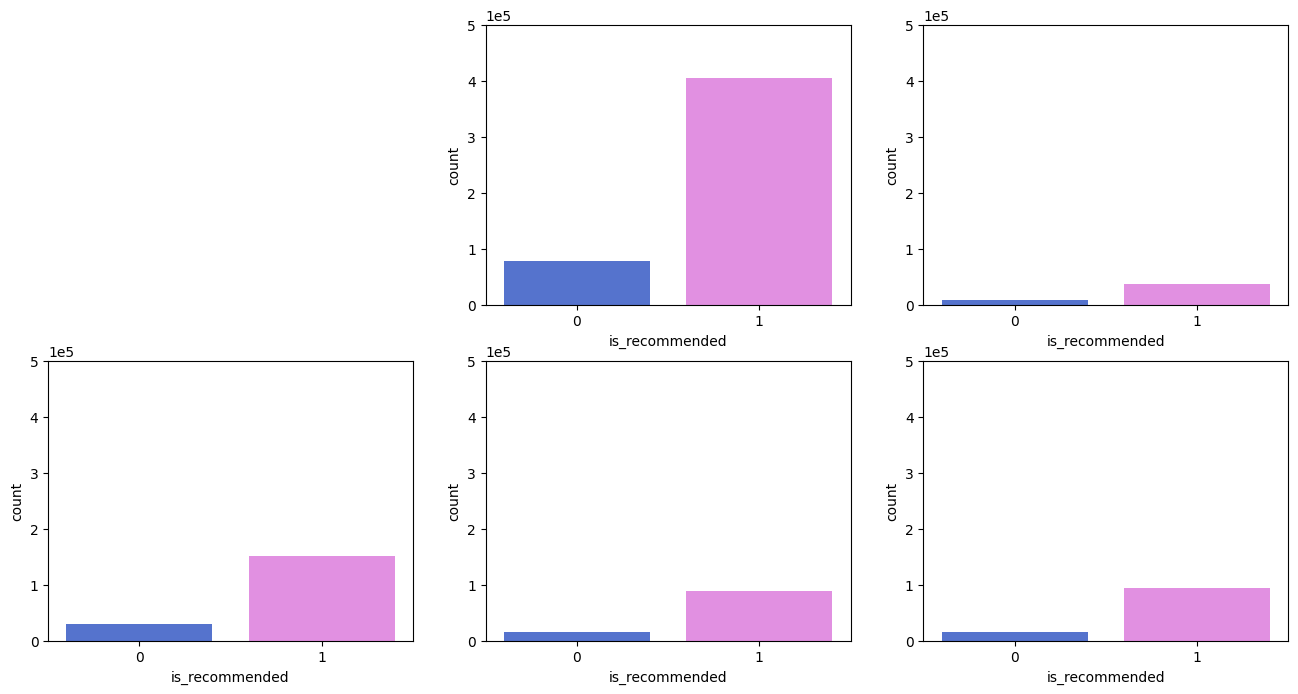

In [2]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
total = {"Positive": 0, "Negative": 0}

for ind in tqdm(range(1, 6)):
    exec(f'df_{ind} = pd.read_csv("reviews_{ind}.csv")')
    exec(f'df_{ind} = df_{ind}[["is_recommended", "review_text"]]')
    exec(f'df_{ind} = df_{ind}.dropna()')
    exec(f'df_{ind}.is_recommended = df_{ind}.is_recommended.astype(int)')
    g = eval(f'sns.countplot(x="is_recommended", data=df_{ind}, palette=["royalblue","violet"], ax=axes[ind//3, ind%3])')
    g.set_ylim(0, 5e5)
    g.ticklabel_format(style='sci', scilimits=(0, 0), axis='y')
    pos, neg = eval(f'df_{ind}.is_recommended.value_counts().to_list()')
    total["Positive"] = total.get("Positive") + pos
    total["Negative"] = total.get("Negative") + neg
    
else:
    fig.delaxes(axes[0][0])

# 2. Collecting information from files into the one DataFrame

In [3]:
result_df = df_1

for item in [df_2, df_3, df_4, df_5]:
    result_df = pd.concat([result_df, item], axis=0)
else:
    print(f"Total amount of rows is: {len(result_df)}")

Total amount of rows is: 924979


As we can see, our **target is imbalanced** (84% of positive reviews and 16% of negative reviews)

Building a model using imbalanced data can be difficult since model will often favour the majority class. Imbalance in the target variable is a result of various factors including the target variable being a rare or extreme event, inadequate data collection, and errors in measurement. Datasets with an imbalanced target feature will often have a high cost of misclassification error.

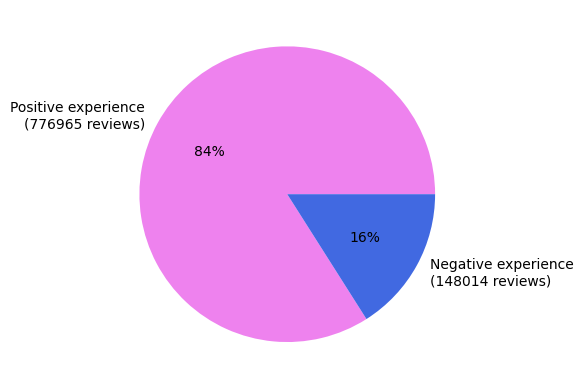

In [4]:
# plotting data on chart

pos_amount, neg_amount = result_df.is_recommended.value_counts().to_list()
palette_color = sns.color_palette(["violet","royalblue"]) 
plt.pie(
    result_df.is_recommended.value_counts(), 
    labels=[
        f"Positive experience\n({pos_amount} reviews)", 
        f"Negative experience\n({neg_amount} reviews)"
    ], 
    colors=palette_color, autopct='%.0f%%') 
plt.show()

In [5]:
# store-and-forward

# result_df.to_csv('result_df.csv')
# result_df = pd.read_csv("result_df.csv")
# result_df.head()

# 3. Undersampling

To handle with the problem of imbalanced target, let's use undersampling approach.<br>

* (+) **No need to introduce redundant information into the dataset**. The main advantage that undersampling has is that we do not have to add any artificial observations to our dataset that introduce repeated or redundant information. Why is this beneficial? Because when we duplicate existing observations (or create close analogs of existing observations), we are making it seem like the patterns that are seen in those observations are more widespread than they really are. This can lead to things like models overfitting to specific patterns that were only seen in a few observations in the original dataset. 
* (+) **Downsizing dataset**. According to the architecture of our task, we have to stick the principle of minimal memory consumption. And our dataset allow us to keep sufficient amount of data to be in the big data stack.
* (-) **Loses information**. Of cours, this way there is some loss of information. When we permanently remove observations from our dataset, we will naturally lose the information that was contained within those observations. 

In [6]:
result_df.head(15)

,is_recommended,review_text
0,1,I use this with the Nudestix “Citrus Clean Bal...
1,0,I bought this lip mask after reading the revie...
2,1,My review title says it all! I get so excited ...
3,1,I’ve always loved this formula for a long time...
4,1,"If you have dry cracked lips, this is a must h..."
5,1,The scent isn’t my favourite but it works grea...
6,0,I’ll give this 2 stars for nice packaging and ...
7,1,I use this at night or while I’m putting makeu...
8,1,I love this stuff. I first had the sample size...
9,1,I purchased the Sweet Candy scent at my local ...


In [7]:
# Separate majority and minority classes

df_minority = result_df[result_df.is_recommended==0]
df_majority = result_df[result_df.is_recommended==1]

In [8]:
# Downsample majority class

df_majority_downsampled = resample(
                                    df_majority,                # a dataframe with the majority class
                                    replace=False,              # sample without replacement
                                    n_samples=len(df_minority), # to match minority class 
                                    random_state=seed           # fix the random seed
)    

In [9]:
# Combine minority class with downsampled majority class

df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled

,is_recommended,review_text
577697,1,"Love this product, the texture of the product ..."
110250,1,"This cleansing milk is creamy, calming, and cl..."
182766,1,The bareminerals Skinlongevity Long Life Herb ...
266937,1,I hesitated on spending $$$$ for this but WOW!...
92755,1,I was looking for a cleanser that removed all ...
...,...,...
119199,0,Recently I’ve become a huge fan of cleansing b...
119201,0,I normally use two methods of taking off my ma...
119202,0,As much as I wanted to enjoy this makeup remov...
119227,0,I was excited to try this one but unfortunatel...


In [10]:
result_df.loc[577697]

is_recommended                                                    1
review_text       Love this product, the texture of the product ...
Name: 577697, dtype: object

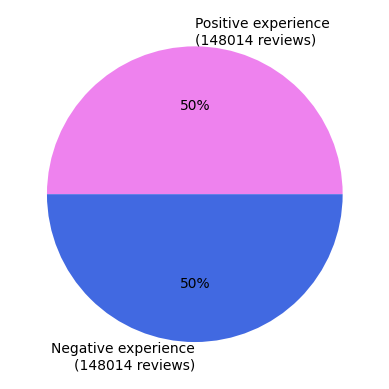

In [11]:
# plotting data on chart 

pos_amount, neg_amount = df_downsampled.is_recommended.value_counts().to_list()
palette_color = sns.color_palette(["violet","royalblue"]) 
plt.pie(
    df_downsampled.is_recommended.value_counts(), 
    labels=[
        f"Positive experience\n({pos_amount} reviews)", 
        f"Negative experience\n({neg_amount} reviews)"
    ], 
    colors=palette_color, autopct='%.0f%%') 
plt.show()

# Train, validation, test split

In [12]:
X, y = df_downsampled.review_text, df_downsampled.is_recommended

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=seed) # 0.25 x 0.8 = 0.2

In [15]:
TRAIN = pd.concat([X_train, y_train], axis=1)
VAL = pd.concat([X_val, y_val], axis=1)
TEST = pd.concat([X_test, y_test], axis=1)

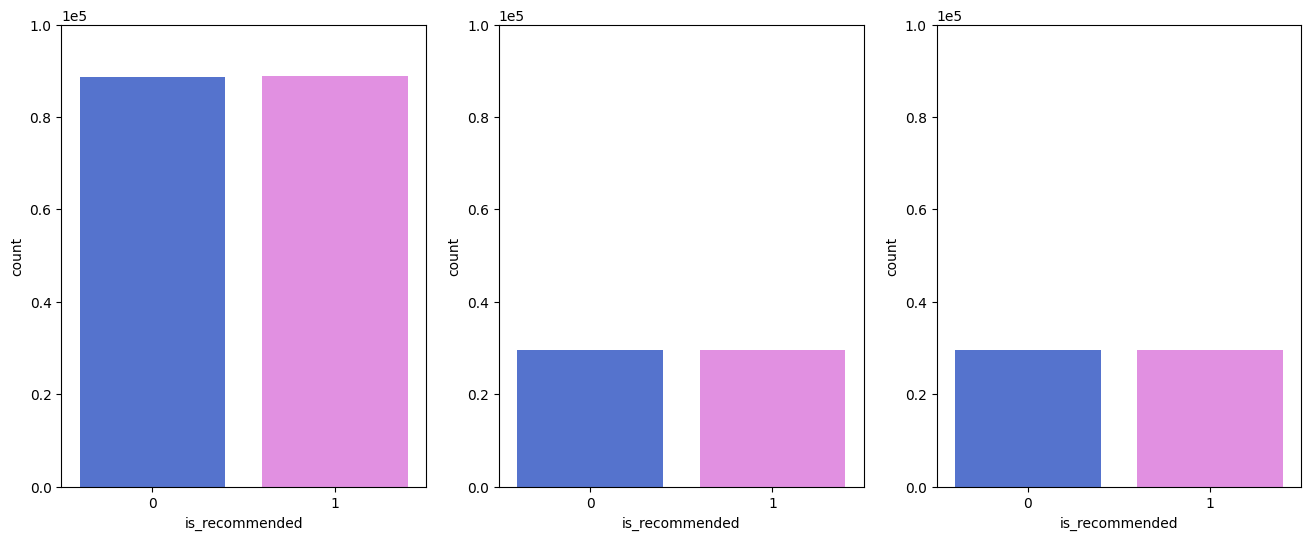

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

for ind, dataset in enumerate([TRAIN, VAL, TEST]):
    g = sns.countplot(x="is_recommended", data=dataset, palette=["royalblue","violet"], ax=axes[ind%3])
    g.set_ylim(0, 1e5)
    g.ticklabel_format(style='sci', scilimits=(0, 0), axis='y')

# Save splitted data to files

So, we have completed data loading process. Total size of files with scrapped information was 520.5 MB, but after our work we finished with 93.2 MB

In [4]:
TRAIN.to_parquet('train.parquet.gzip', compression='gzip')
VAL.to_parquet('val.parquet.gzip', compression='gzip')
TEST.to_parquet('test.parquet.gzip', compression='gzip')

In [5]:
total_prepared_files = 0

for data_file in ['train.parquet.gzip', 'val.parquet.gzip', 'test.parquet.gzip']:
    size = round(os.path.getsize(data_file)/(pow(1024,2)), 2)
    total_prepared_files += size
else:
    print(f"In total prepared files: {total_prepared_files} MB")

In total prepared files: 33.17 MB


In [19]:
total_raw_files = 0

for data_file in ['reviews_1.csv', 'reviews_2.csv', 'reviews_3.csv', 'reviews_4.csv', 'reviews_5.csv']:
    size = round(os.path.getsize(data_file)/(pow(1024,2)), 2)
    total_raw_files += size
else:
    print(f"In total raw files: {total_raw_files} MB")

In total raw files: 496.89 MB
